## Importing libraries

In [1]:
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

# Removing unwanted tensorflow logs
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.__version__

%matplotlib inline

## Importing trianing data

In [2]:
!dir

 Volume in drive D is Ezio
 Volume Serial Number is B48E-772E

 Directory of D:\Projects\Covid 19 using chest x-rays --- PyTorch\Project Making

14-11-2020  20:32    <DIR>          .
14-11-2020  20:32    <DIR>          ..
14-11-2020  19:39    <DIR>          .ipynb_checkpoints
14-11-2020  20:32             5,624 covid19_detection_using_tensorflow.ipynb
14-11-2020  19:37    <DIR>          test
14-11-2020  19:37    <DIR>          train
               1 File(s)          5,624 bytes
               5 Dir(s)  123,486,818,304 bytes free


In [3]:
os.listdir('train')

['covid', 'normal', 'viral']

In [4]:
training_covid_dir = "train/covid/"
training_normal_dir = "train/normal/"
training_viral_dir = "train/viral/"

print(len(os.listdir(training_covid_dir)))
print(len(os.listdir(training_normal_dir)))
print(len(os.listdir(training_viral_dir)))

189
200
200


## Importing test data

In [5]:
os.listdir('test')

['covid', 'normal', 'viral']

In [6]:
testing_covid_dir = "test/covid/"
testing_normal_dir = "test/normal/"
testing_viral_dir = "test/viral/"

print(len(os.listdir(testing_covid_dir)))
print(len(os.listdir(testing_normal_dir)))
print(len(os.listdir(testing_viral_dir)))

30
30
30


## Defining model structure

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
import keras
from tf.keras.applications import InceptionResNetV2

In [22]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1024, activation ='relu'),
    Dense(3, activation='softmax')
])


In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 36992)            

In [27]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
TRAINING_DIR = "train/"

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, batch_size = 10, class_mode = 'categorical', target_size = (150,150)
)

Found 589 images belonging to 3 classes.


In [34]:
VALIDATION_DIR = "test/"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, batch_size = 10, class_mode = 'categorical', target_size = (150,150)
)

Found 90 images belonging to 3 classes.


In [36]:
history = model.fit(train_generator,
                              epochs=15,
                              validation_data=validation_generator)

Epoch 1/15
59/59 [==============================] - 55s 928ms/step - loss: 0.9887 - acc: 0.6350 - val_loss: 0.3730 - val_acc: 0.8444
Epoch 2/15
59/59 [==============================] - 27s 456ms/step - loss: 0.3457 - acc: 0.8591 - val_loss: 0.3371 - val_acc: 0.8778
Epoch 3/15
59/59 [==============================] - 28s 481ms/step - loss: 0.2022 - acc: 0.9304 - val_loss: 0.2910 - val_acc: 0.8667
Epoch 4/15
59/59 [==============================] - 29s 497ms/step - loss: 0.1438 - acc: 0.9406 - val_loss: 0.7501 - val_acc: 0.8556
Epoch 5/15
59/59 [==============================] - 29s 490ms/step - loss: 0.2955 - acc: 0.8981 - val_loss: 0.3189 - val_acc: 0.8889
Epoch 6/15
59/59 [==============================] - 29s 495ms/step - loss: 0.1709 - acc: 0.9338 - val_loss: 0.2988 - val_acc: 0.8667
Epoch 7/15
59/59 [==============================] - 29s 498ms/step - loss: 0.0519 - acc: 0.9864 - val_loss: 0.3162 - val_acc: 0.9111
Epoch 8/15
59/59 [==============================] - 29s 487ms/step - 

Text(0.5, 1.0, 'Training and validation loss')

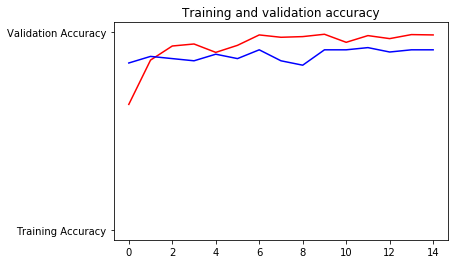

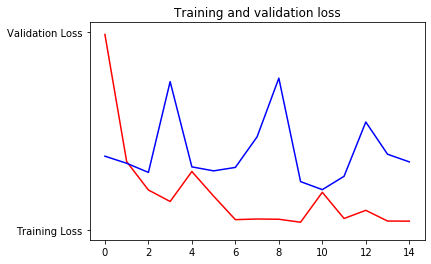

In [40]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')